# Analiza irysów
Irysy to rośliny z rodziny kosaćcowatych. Występują one w co najmniej 311 gatunkach. Cenione są z powodu efektownych i bardzo zróżnicowanych pod względem formy i barwy kwiatów. Bardzo liczne gatunki, mieszańce i odmiany uprawiane są jako rośliny ozdobne. Poniżej przeanalizowano rozmiary 3 gatunków irysów:

- Iris setosa
- Iris versicolor
- Iris virginica

![zdjęcia irysów](iris-machinelearning.png)

## O danych

Zbiór danych zawiera informacje o trzech gatunkach irysów: Iris setosa, Iris versicolor, i Iris virginica.

Dane obejmują pomiary czterech cech: długość i szerokość działki kielicha (sepal) oraz długość i szerokość płatka (petal).

Każdy wiersz w zbiorze danych reprezentuje pojedynczy kwiat, a wartości pomiarów są podane w centymetrach.


In [4]:
# import bibliotek pythona
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# zapewnienie wyświetlania każdej kolumny tabeli
pd.set_option('display.max_columns', None)

In [5]:
# załadowanie danych z pliku csv
df = pd.read_csv('25__iris.csv', sep=",")
df.rename(columns={
    'długość kielicha (sepal length)': 'długość kielicha',
    'szerokość kielicha (sepal width)': 'szerokość kielicha',
    'długość płatka (petal length)': 'długość płatka',
    'szerokość płatka (petal width)': 'szerokość płatka',
    'klasa (class)': 'gatunek',
}, inplace=True)

## 1. Ogólny przegląd danych

- 5 losowych wierszy

In [100]:
df.sample(5)

,długość kielicha,szerokość kielicha,długość płatka,szerokość płatka,gatunek
29,4.7,3.2,1.6,0.2,Iris-setosa
119,6.0,2.2,5.0,1.5,Iris-virginica
116,6.5,3.0,5.5,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
39,5.1,3.4,1.5,0.2,Iris-setosa


In [27]:
%%capture
# sprawdzenie typów danych w poszczególnych kolumnach
df.info()

In [34]:
%%capture
# sprawdzenie ilości wartości unikalnych w poszczególnych kolumnach
df.nunique()

In [32]:
%%capture
# obliczenie ilości rekordów dla każdej klasy
df['gatunek'].value_counts()

- Obliczenie minimum i maksimum dla każdej kolumny numerycznej

In [39]:
%%capture
# obliczenie podstawowych statystyk dla każdej kolumny
df.describe()

In [13]:
# podstawowe statystyki
df.describe().round(2).T.loc[:, ["min", "max"]]

,min,max
długość kielicha,4.3,7.9
szerokość kielicha,2.0,4.4
długość płatka,1.0,6.9
szerokość płatka,0.1,2.5


In [40]:
%%capture
# częstość występowanie poszczególnych szerokości płatka
df['szerokość kielicha'].value_counts().sort_index()

In [45]:
%%capture
# brakujące wartości
df.isnull().sum()

In [51]:
%%capture
# sprawdzamy istnienie duplikatów
df[df.duplicated()]

- Spostrzeżenia i wnioski wstępne

Dane są kompletne - zawierają 150 wierszy - po 50 dla każdego gatunku.
Cechą o największym zróżnicowaniu może się wstępnie wydawać szerokość płatka, ponieważ wartość maksymalna jest aż 10-krotnie większa od minimalnej, a w dodatku te skrajne wartości pojawiają się w kilku pomiarach.

## 2. Badanie pojedynczych kolumn

- Analiza kolumn bez podziału na gatunki

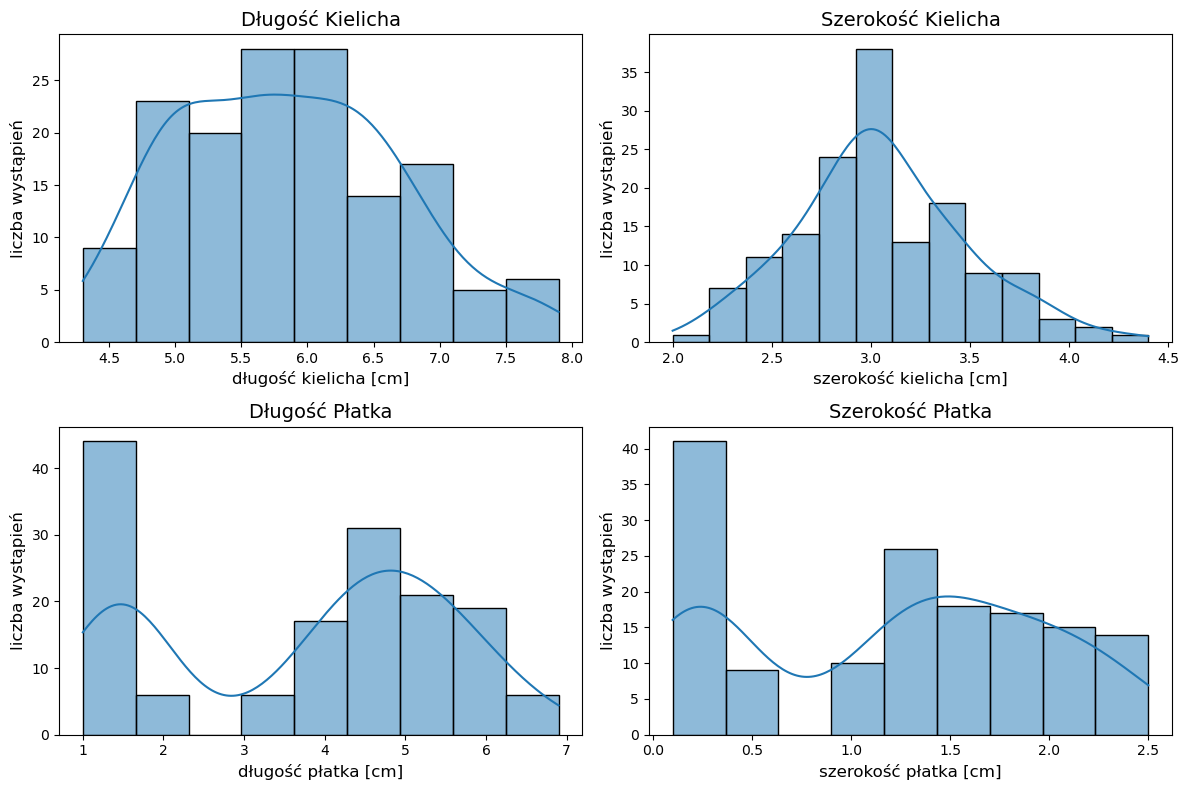

In [49]:
# stworzenie przestrzeni na histogramy dla wszystkich kolumn numerycznych
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
fontsize_title = 14
fontsize_label = 12

# stworzenie listy kolumn numerycznych
numerical_columns = ['długość kielicha', 'szerokość kielicha', 
                     'długość płatka', 'szerokość płatka']

# iterujemy po liście kolumn numerycznych i dla każdej generujemy histogram z KDE
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(numerical_columns[i].title(), fontsize=fontsize_title)
    axes[i].set_xlabel(numerical_columns[i]+' [cm]', fontsize=fontsize_label)
    axes[i].set_ylabel('liczba wystąpień', fontsize=fontsize_label)

# dostosowujemy połozenie automatycznie
plt.tight_layout()

- Analiza z rozróżnieniem poszczególnych gatunków

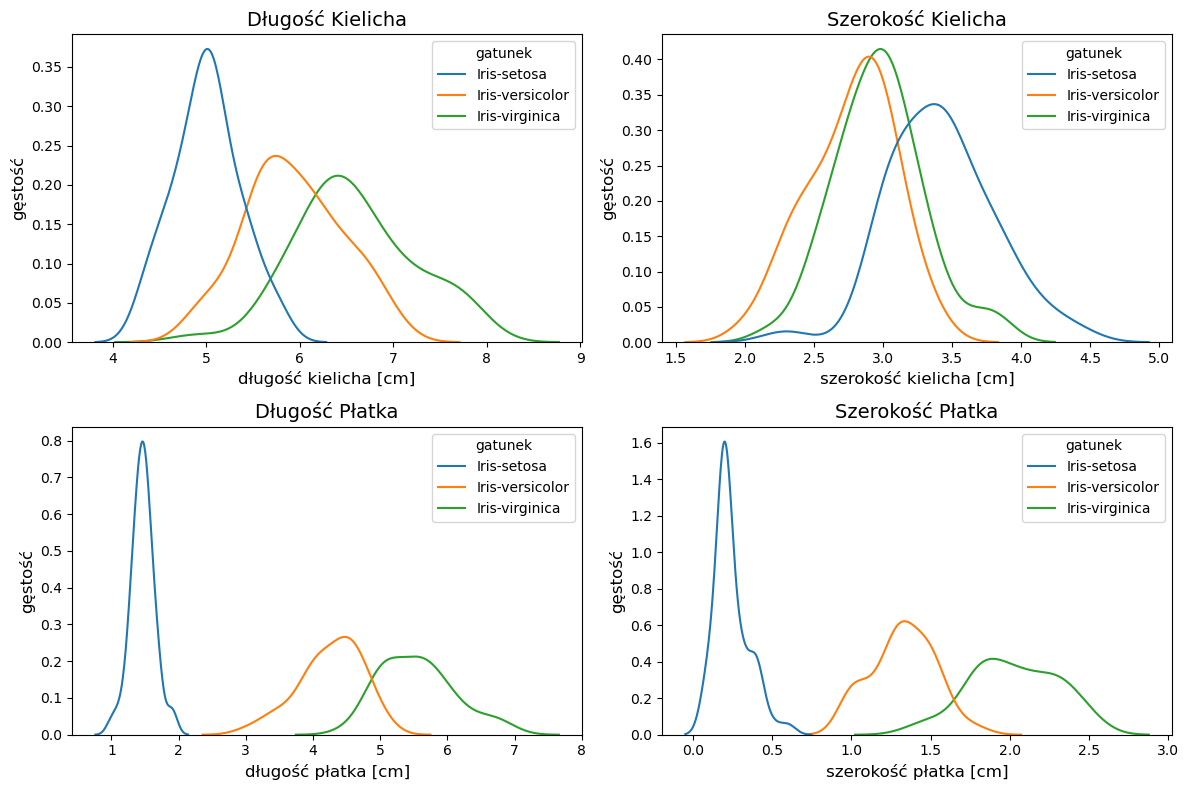

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Zmiana na 2 wiersze i 2 kolumny
columns = df.columns[0:4]

# Spłaszczenie tablicy axes dla prostszej iteracji
axes = axes.flatten()

# Rysowanie linii KDE
for i, col in enumerate(columns):
    sns.kdeplot(data=df, x=col, hue=df.columns[4], ax=axes[i])
    axes[i].set_title(numerical_columns[i].title(), fontsize=fontsize_title)
    axes[i].set_xlabel(numerical_columns[i]+' [cm]', fontsize=fontsize_label)
    axes[i].set_ylabel('gęstość', fontsize=fontsize_label)

plt.tight_layout()  # Uporządkuj układ wykresów
plt.show()

Wymiary płatka dość jednoznacznie określają gatunek irysa, natomiast wymiary kielicha powtarzają swoje
wartości dla różnych gatunków.

In [80]:
%%capture
# obliczamy średnią atyrmetyczną dla kolumn numerycznych w poszczególnych klasach
df_class_mean = df.groupby('gatunek').mean()
df_class_mean

- Zestawienie wartości średnich dla każdego gatunku

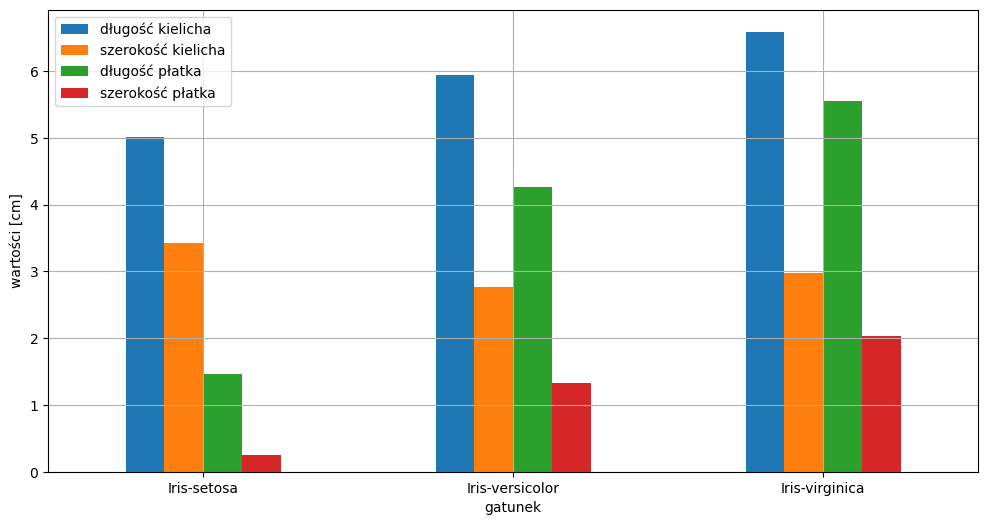

In [60]:
# tworzymy wykres przedstawiający klasy wraz ze średnimi wartościami kolumn numerycznych osiąganych w tych klasach
df.groupby('gatunek', as_index=False).mean().plot(
    kind='bar',
    x='gatunek', 
    y=['długość kielicha', 'szerokość kielicha', 'długość płatka', 'szerokość płatka'],
    figsize=(12, 6)
)

plt.xticks(rotation=0)
plt.ylabel('wartości [cm]')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left')
plt.grid(True)

plt.show()


- Wartości odstające

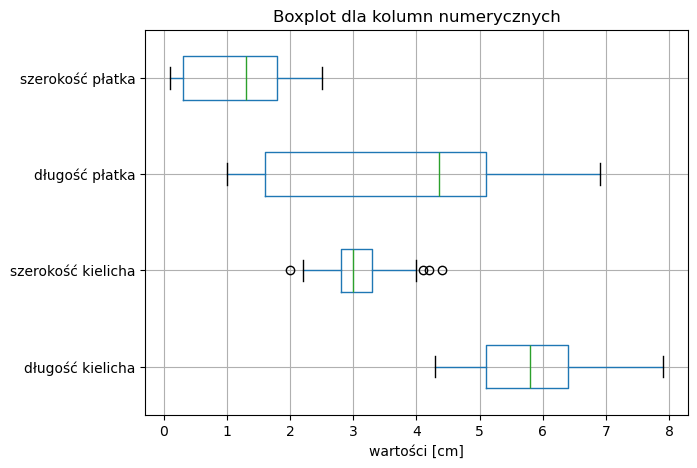

In [62]:
# Rysujemy boxploty dla każdej kolumny numerycznej, aby znaleźć wartości odstające
plt.figure(figsize=(7, 5))
df.select_dtypes(include='number').boxplot(vert=False)

# instrukcje dotyczące podpisu osi X
plt.xlabel('wartości [cm]')


#tytuł wykresu
plt.title('Boxplot dla kolumn numerycznych')
plt.show()

Wartości odstające (będące poza założonym przedziałem ufności) występują jedynie dla szerokości kielicha.
Rozpatrzymy tę cechę dla wszystkich 3 gatunków na wykresie poniżej.

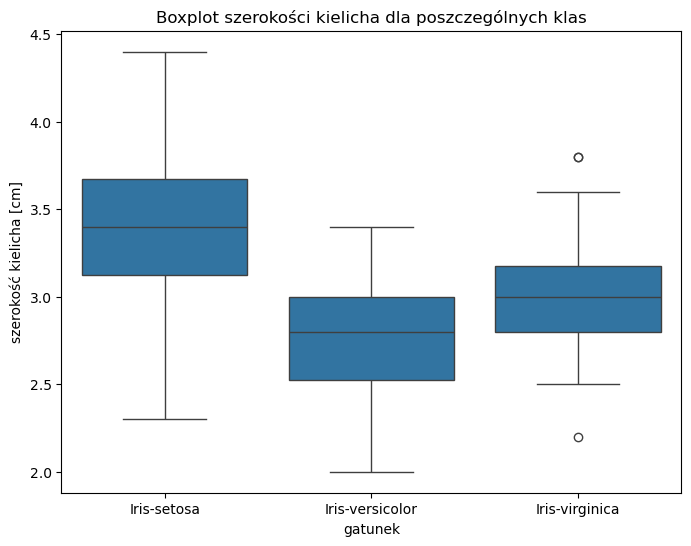

In [53]:
# Rysowanie barplotów szerokości kielicha dla każdej klasy
plt.figure(figsize=(8, 6))
sns.boxplot(x='gatunek', y='szerokość kielicha', data=df)

# tytuł
plt.title('Boxplot szerokości kielicha dla poszczególnych klas')

# instrukcje dotyczące rozmieszczenia indformacji na osiach X i Y
plt.xlabel('gatunek')
plt.ylabel('szerokość kielicha [cm]')
plt.show()

Wartości odstające dla szerokości kielicha występują jedynie dla gatunku Iris-virginica.

- Spostrzeżenia i wnioski z analizy pojedycznych kolumn

Analizując wartości pojedynczych kolumn, bez podziału na gatunki, można zauważyć rozkład zbliżony do rozkładu normalnego (krzywej Gaussa) jedynie dla szerokości kielicha. Długość i szerokość płatka mają natomiast rozkład przemienny - przypominający sinusoidę. Przy rozpatrywaniu każdego gatunku z osobna każda cecha ma już rozkład zbliżony do normalnego.
Największe średnie wymiary kielicha i płatka ma gatunek Iris-virginica - z wyjątkiem szerokości kielicha - tu największa średnia wartość przypada dla Iris-setosa. W pozostałych trzech cechach Iris-setosa przyjmuje wartości najmniejsze.
Wartości odstające występuję tylko w klasie Iris-virginica dla szerokości kielicha. Są podstawy, aby potraktować to jako błędy pomiarowe, ponieważ zarówno minimalna wartość szerokości kielicha (2cm), jak i maksymalna (4,4cm) występują tylko raz.

## 3. Analiza korelacji między zmiennymi

<b>Korelacja</b> to wzajemne powiązanie między dwoma zmiennymi. Określa się ją na podstawie współczynnika korelacji, który może przyjmować wartości od -1 do 1:
- 1 oznacza silną korelację dodatnią - obie zmienne rosną
- -1 oznacza silną korelację ujemną - jedna zmienna rośnie, a druga maleje
- 0 oznacza brak zależności między zmiennymi

- Macierz korelacji bez podziału na gatunki

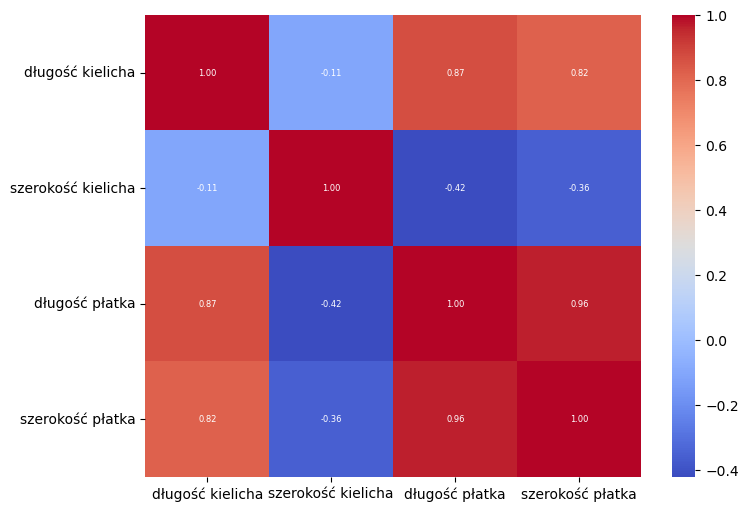

In [ ]:
# stworzenie macierzy korelacji między cechami
plt.figure(figsize=(8,6))
corr = df.drop(columns='gatunek').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()


W powyższej macierzy możemy dostrzec silną korelację dodatnią między długością płatka i szerokością płatka, długością płatka i długością kielicha oraz między szerokością płatka i długością kielicha. W kolejnym kroku, sporządzając wykresy regresji liniowych, sprawdzimy powtarzalność tych trendów dla poszczególnych gatunków.

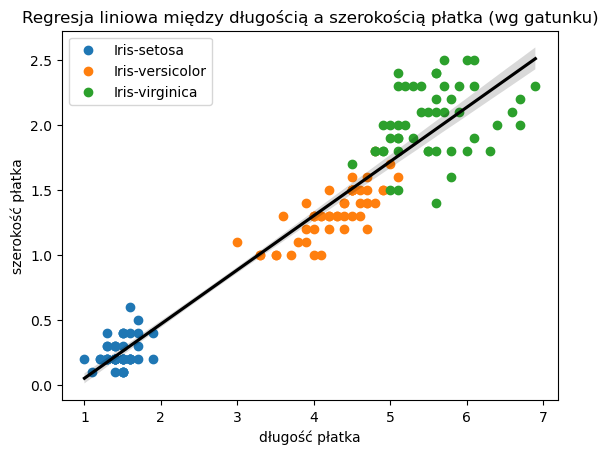

In [9]:
for gatunek in df['gatunek'].unique():
    gatunek_df = df[df['gatunek'] == gatunek]
    plt.scatter(gatunek_df['długość płatka'], gatunek_df['szerokość płatka'], label=gatunek)

# Rysowanie linii regresji dla całego zbioru
sns.regplot(x='długość płatka', y='szerokość płatka', data=df, scatter=False, color='black')

plt.title('Regresja liniowa między długością a szerokością płatka (wg gatunku)')
plt.xlabel('długość płatka')
plt.ylabel('szerokość płatka')
plt.legend()
plt.show()

Korelacja dodatnia występuje dla wszystkich gatunków, jednak
wyraźnie największa dla gatunku Iris-versicolor (pomarańczowy wykres punktowy najmniej odbiega od linii trendu).

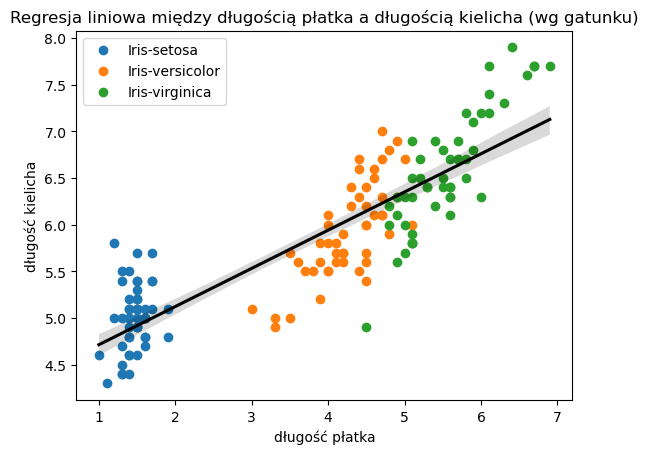

In [42]:
for gatunek in df['gatunek'].unique():
    gatunek_df = df[df['gatunek'] == gatunek]
    plt.scatter(gatunek_df['długość płatka'], gatunek_df['długość kielicha'], label=gatunek)

# Rysowanie linii regresji dla całego zbioru
sns.regplot(x='długość płatka', y='długość kielicha', data=df, scatter=False, color='black')

plt.title('Regresja liniowa między długością płatka a długością kielicha (wg gatunku)')
plt.xlabel('długość płatka')
plt.ylabel('długość kielicha')
plt.legend()
plt.show()

Korelacja dodatnia występuje dla wszystkich 3 gatunków, ale wyraźnie najmniejsza dla Iris-setosa.

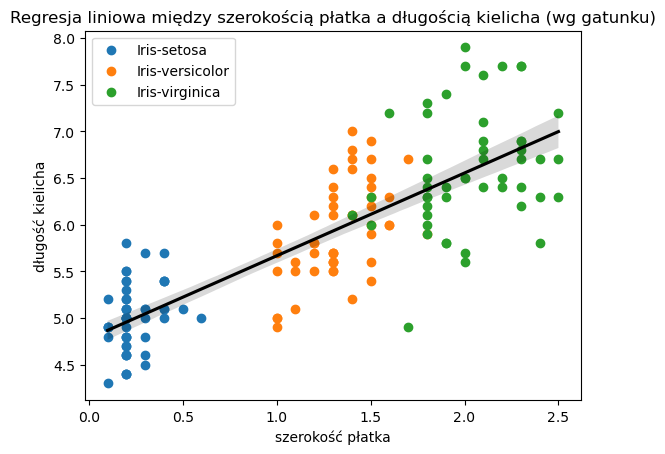

In [44]:
for gatunek in df['gatunek'].unique():
    gatunek_df = df[df['gatunek'] == gatunek]
    plt.scatter(gatunek_df['szerokość płatka'], gatunek_df['długość kielicha'], label=gatunek)

# Rysowanie linii regresji dla całego zbioru
sns.regplot(x='szerokość płatka', y='długość kielicha', data=df, scatter=False, color='black')

plt.title('Regresja liniowa między szerokością płatka a długością kielicha (wg gatunku)')
plt.xlabel('szerokość płatka')
plt.ylabel('długość kielicha')
plt.legend()
plt.show()

Mała korelacja dodatnia dla wszystkich 3 gatunków.

In [45]:
%%capture
df_class = df[df['gatunek'] == 'Iris-setosa']
    
# tworzymy zmienną, do której przypisujemy macierz korelacji dla wszystkich kolumn numerycznych
corr = df_class.drop(columns='gatunek').corr()
    
# rysujemy macierze korelacji
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True)
plt.show()

In [32]:
%%capture
df_class = df[df['gatunek'] == 'Iris-versicolor']
    
# tworzymy zmienną, do której przypisujemy macierz korelacji dla wszystkich kolumn numerycznych
corr = df_class.drop(columns='gatunek').corr()
    
# rysujemy macierze korelacji
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True)
plt.show()

In [33]:
%%capture
df_class = df[df['gatunek'] == 'Iris-virginica']
    
# tworzymy zmienną, do której przypisujemy macierz korelacji dla wszystkich kolumn numerycznych
corr = df_class.drop(columns='gatunek').corr()
    
# rysujemy macierze korelacji
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True)
plt.show()

- Wnioski do macierzy korelacji i regresji liniowych

Nie można dostrzec dwóch cech, które utrzymują silną korelację dla wszystkich 3 gatunków. Gatunek o najmniejszych współczynikach korelacji to Iris-setosa - występuje w nim silna korelacja dodatnia (0.75) jedynie między szerokością kielicha i długością kielicha. W gatunkach Iris-versicolor i Iris-Virginica widzimy wysokie dodatnie korelację między długością płatka i długością kielicha (kolejno 0.75 i 0.86). W Iris-virginica, który charakteryzuje się największymi wartościami współczyników korelacji, możemy dodatkowo dostrzec silną zależność długości płatka od szerokości płatka (0.79).

## 4. Podsumowanie

- Wnioski do całej analizy

Zbiór danych złożony ze 150 rekordów okazał się wystarczający do przeprowadzenia analizy i wyodrębnienia
cech charakterystycznych każdego gatunku. Wniosek jest prosty - w celu ustalenia gatunku napotkanego irysa
najrozsądniej będzie mierzyć jego płatek, a nie kielich. Jeśli wymiary płatka wynoszą
odpowiednio ok. 1,5x0,2cm to jest to gatunek Iris-setosa, jeśli ok. 4,3x1,2cm to Iris-versicolor, a jeśli
ok. 5,5x2cm to zapewne Iris-virginica.

In [63]:
!jupyter nbconvert iris.ipynb --to html --no-input --no-prompt

[NbConvertApp] Converting notebook iris.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 951780 bytes to iris.html
